In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ushape.csv", header=None)
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


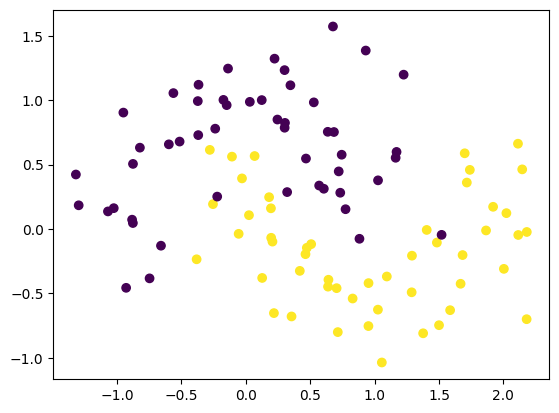

In [3]:
plt.scatter(df[0],df[1],c=df[2])

In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [6]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\HP\Deep-Learning-CampusX\campus\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.get_weights()

[array([[-0.00940313,  1.9844086 , -0.08551497, -1.2322288 , -1.3886276 ,
         -0.8766124 ,  0.35547405,  0.8385282 ,  0.52410406, -0.55045146],
        [-0.11289068, -0.85712147,  0.95186716,  1.8792683 , -0.07911975,
         -0.07762329, -0.49688524, -1.964253  ,  0.3382448 ,  0.7081634 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.4611825 ,  0.00607864,  0.30923337,  0.9453562 , -0.38783628,
         -0.12268178, -0.73412937, -0.2431585 ,  0.10928914,  0.03552147],
        [ 0.05740095, -0.6308074 , -0.393751  , -0.12863222,  0.22251801,
          0.5104298 , -0.18793726,  0.5686424 ,  0.00557753,  0.4735529 ],
        [ 0.782034  ,  0.5536287 ,  0.12354127,  0.8355683 ,  0.7799193 ,
         -0.1411136 , -0.16832145, -0.6368608 , -0.3372729 , -0.9905056 ],
        [-0.27982962,  0.11823115, -0.16586663,  0.8393493 , -0.65317667,
         -0.25136542, -0.37723175, -0.39787704,  0.47020766,  0.14254251],
        [-0.53807

In [8]:
initial_weights = model.get_weights()

In [9]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [10]:
model.set_weights(initial_weights)

In [11]:
model.get_weights()

[array([[-0.09947725, -0.27181238, -0.4098816 , -0.23874559,  0.6087406 ,
          0.3949521 , -1.1849391 ,  0.16106763, -0.78378314,  0.03350766],
        [ 0.6266172 ,  0.07835449,  0.20688812,  0.0850236 ,  0.845883  ,
          1.0528023 , -0.8628869 ,  0.39093637, -0.14456731, -0.31714767]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.4051308 , -0.05845739,  0.05782178,  0.19361049, -0.59174144,
         -0.43506238, -0.22989704,  0.10549934, -0.15518291,  0.24658793],
        [ 0.04177886,  0.26838872,  0.10747159,  0.18300018, -0.4343884 ,
          0.10719601, -0.2351244 ,  0.4041807 ,  0.05643412, -0.02564961],
        [ 0.0492368 , -0.4604786 , -0.21984135,  0.10023893,  0.02646584,
         -0.1459087 , -0.06744452,  0.2869364 ,  0.5135893 , -0.48802847],
        [-0.26097548,  0.09774978,  0.45416352,  0.11142255, -0.5265467 ,
          0.01495137, -0.10088804,  0.06460771, -0.15991132, -0.18906376],
        [-0.98321

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.3953 - loss: 0.6939 - val_accuracy: 0.4000 - val_loss: 0.6782
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4484 - loss: 0.6880 - val_accuracy: 0.5000 - val_loss: 0.6713
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5414 - loss: 0.6802 - val_accuracy: 0.5000 - val_loss: 0.6652
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5195 - loss: 0.6756 - val_accuracy: 0.5000 - val_loss: 0.6596
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5227 - loss: 0.6717 - val_accuracy: 0.5500 - val_loss: 0.6539
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5297 - loss: 0.6728 - val_accuracy: 0.6000 - val_loss: 0.6485
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6383 - loss: 0.6578 - val_accuracy: 0.6000 - val_loss: 0.6428
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6484 - loss: 0.6540 - val_accuracy: 0.6000 - val_loss

In [14]:
model.get_weights()

[array([[-0.1957134 , -0.2904601 , -0.50229084, -0.13066885,  0.67512286,
          0.23793817, -1.3775262 ,  0.41371733, -0.9650278 ,  0.26444584],
        [ 0.85004306,  0.21603698,  0.18208557,  0.34234402,  0.7910349 ,
          1.2305913 , -0.641988  ,  0.2892534 , -0.06889514, -0.47650227]],
       dtype=float32),
 array([ 0.15941074, -0.0538615 , -0.14262126,  0.18046093,  0.07369882,
        -0.01857016, -0.02713347,  0.10060871, -0.07142862,  0.11191951],
       dtype=float32),
 array([[-0.4051308 ,  0.12513033,  0.23589829,  0.36173758, -0.77540386,
         -0.43506238, -0.36857972,  0.2743247 , -0.03339819, -0.06194818],
        [ 0.04177886,  0.3537041 ,  0.18175678,  0.2853329 , -0.33398834,
          0.10719601, -0.25286222,  0.4075031 ,  0.20612651,  0.09170754],
        [ 0.0492368 , -0.29385096, -0.06055229,  0.27009413,  0.02646584,
         -0.1459087 , -0.05094917,  0.35226685,  0.6938741 , -0.39508325],
        [-0.26097548,  0.21828732,  0.5921923 ,  0.23400041, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

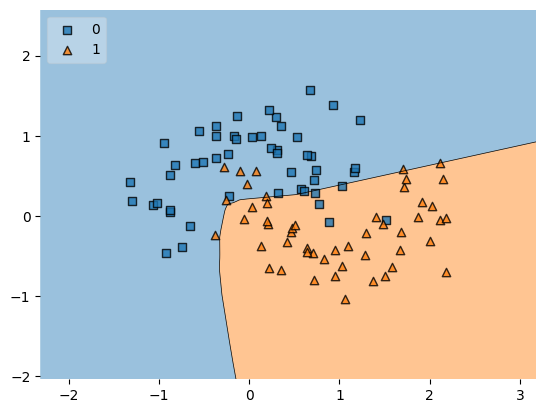

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [16]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.026152856373990754)

In [17]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.029800945652178626)